# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

##  План установления параметров для определения рыночной стоимости объектов недвижимости    

1. Откроем файл с данными и изучим общую информацию


2. Осуществим предобработку данных
    - определим и изучим пропущенные значения
    - заполним пропуски, где это уместно 
    - укажем причины, которые могли привести к пропускам в данных
    - приведем данные к нужным типам

3. Посчитаем и добавим в таблицу:
    - цену квадратного метра
    - день недели, месяц и год публикации объявления
    - этаж квартиры; варианты — первый, последний, другой
    - соотношение жилой и общей площади, а также отношение площади кухни к общей

4. Проведем исследовательский анализ данных и выполним инструкции:
   - Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра
   - Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа
   - Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили
   - Изучим, зависит ли цена квадратного метра от числа комнат, удалённости от центра
   - Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
   - Изучим зависимость цены от даты размещения: дня недели, месяца и года


   - Выберем 10 населённых пунктов с наибольшим числом объявлений 
   - Посчитаем среднюю цену квадратного метра в этих населённых пунктах
   - Выделим населённые пункты с самой высокой и низкой стоимостью жилья
   - Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр:
       - Создадим столбец с расстоянием до центра в километрах
       - Посчитаем среднюю цену для каждого километра
       - Построим график: он должен показывать, как цена зависит от удалённости от центра
       - Определим границу, где график сильно меняется — это и будет центральная зона
       
    - Выделим сегмент квартир в центре
    - Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков
    - Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)
    - Сделаем выводы   

5. Сформулируем общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

### Импорт библиотек   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Изучение файла 

In [2]:
flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о данных таблицы

In [4]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Описание данных:   
   * airports_nearest — расстояние до ближайшего аэропорта в метрах (м)   
   * balcony — число балконов   
   * ceiling_height — высота потолков (м)   
   * cityCenters_nearest — расстояние до центра города (м)   
   * days_exposition — сколько дней было размещено объявление (от публикации до снятия)   
   * first_day_exposition — дата публикации   
   * floor — этаж   
   * floors_total — всего этажей в доме   
   * is_apartment — апартаменты (булев тип)   
   * kitchen_area — площадь кухни в квадратных метрах (м²)   
   * last_price — цена на момент снятия с публикации   
   * living_area — жилая площадь в квадратных метрах(м²)   
   * locality_name — название населённого пункта   
   * open_plan — свободная планировка (булев тип)   
   * parks_around3000 — число парков в радиусе 3 км   
   * parks_nearest — расстояние до ближайшего парка (м)   
   * ponds_around3000 — число водоёмов в радиусе 3 км   
   * ponds_nearest — расстояние до ближайшего водоёма (м)   
   * rooms — число комнат   
   * studio — квартира-студия (булев тип)   
   * total_area — площадь квартиры в квадратных метрах (м²)   
   * total_images — число фотографий квартиры в объявлении   
   Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

Рассмотрим каждый столбец в отдельности

In [5]:
flat['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

In [6]:
flat['total_images'].isna().sum()

0

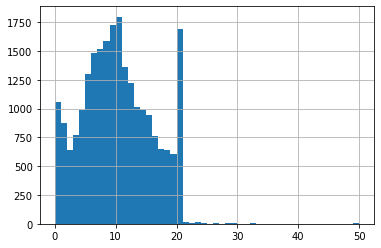

In [7]:
flat['total_images'].hist(bins=50)

Более 1000 обьявлений без фотографий квартиры. Остальные объявления имеют от 1 до 50 фотографий квартиры. Пропусков и ошибок нет. Тип данных - целочисленный, соответствует требованиям данных

In [8]:
flat['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [9]:
flat['last_price'].isna().sum()

0

Столбец с ценами на квартиры не содержит пропусков, тип данных - вещественные числа, соответствует требованиям данных

In [10]:
flat['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [11]:
flat['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Данные с площадью квартир не имеют пропусков. Тип данных - вещественный, соответствует требованиям данных   
Надо проверить квартиры с подозрительно малой (12 м кв.) и большой (900 м кв.) площадью

In [12]:
flat['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [13]:
flat['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [14]:
flat['first_day_exposition'].max()

'2019-05-03T00:00:00'

Данные о дате публикации не содержат пропусков, представлены за период с 27.11.2014г. по 03.05.2019г.   
Тип данных не соответствует требованиям. Требуется привести строки к датам.

In [15]:
flat['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [16]:
flat['rooms'].value_counts().sum()

23699

Столбец с количеством комнат в квартире не имеет пропусков. Тип данных - целочисленный, соответствует требованиям.   
Есть некорректные данные - 197 обьявлений с количеством "0" комнат в квартире 

In [17]:
flat['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [18]:
flat['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Столбец содержит почти 40% пропусков. Есть некорректные данные по высоте потолков (min - 1 метр, max - 100 метров)       
Вещественный тип данных соответствует требованиям. 

In [19]:
flat['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [20]:
flat['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Столбец имеет пропуски.   
Вещественный тип данных не соответствует требованиям, надо поменять на целочисленный.

In [21]:
flat['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Столбец содержит некорректные данные о жилой площади (min - 2 метра), есть пропуски.   
Тип данных - вещественный, соответствует требованиям.

In [22]:
flat['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [23]:
flat['floor'].isna().sum()

0

Данные не содержат пропусков и ошибок. Тип данных - целочисленный, соответствует требованиям 

In [24]:
flat['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [25]:
flat['is_apartment'].isna().sum()

20924

Почти 90% данных в столбце с бинарными признаками апартаментов - пропуски.   
Тип данных object не соответствует требуемому - bool

In [26]:
flat['studio'].describe()

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

In [27]:
flat['studio'].dtypes

dtype('bool')

Булев тип данных соответствует требованиям, пропусков нет. Квартир-студий мало

In [28]:
flat['open_plan'].describe()

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

In [29]:
flat['open_plan'].dtypes

dtype('bool')

Булев тип данных соответствует требованиям, пропусков нет. Квартир со свободной планировкой очень мало 

In [30]:
flat['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Некорректные данные площади кухни (min - 1.3, max - 112). Есть пропуски.   
Вещественный тип данных соответствует требованиям

In [31]:
flat['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [32]:
flat['balcony'].isna().sum()

11519

Столбец содержит почти 50% пропусков. Вещественный тип данных не соответствует требованиям

In [33]:
flat['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [34]:
flat['locality_name'].isna().sum()

49

Данные о населенных пунктах содержат 49 пропусков.   
Более 60% объявлений о квартирах в Санкт-Петербурге, всего упоминается 364 населенных пункта. Тип данных object соответствует требованиям

In [35]:
flat['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [36]:
flat['airports_nearest'].sort_values().unique()

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [37]:
flat['airports_nearest'].isna().sum()

5542

In [38]:
len(flat.query('airports_nearest == 0'))

1

Столбец содержит пропуски. Есть одна запись с некорректными данными, где расстояние от квартиры до аэропорта равно 0 метров.   
Вещественный тип данных соответствует требованиям

In [39]:
flat['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [40]:
flat['cityCenters_nearest'].isna().sum()

5519

Есть пропуски.   
Вещественный тип данных соответствует требованиям. В названии столбца присутствует заглавная буква, но она нам не мешает.

In [41]:
flat['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [42]:
flat['parks_around3000'].isna().sum()

5518

Данные о наличии парков в радиусе 3 км содержат пропуски. Вещественный тип данных надо заменить на целочисленный

In [43]:
flat['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

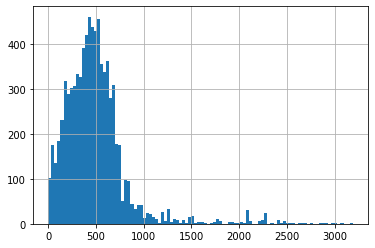

In [44]:
flat['parks_nearest'].hist(bins=100)

In [45]:
flat['parks_nearest'].isna().sum()

15620

Более 60% данных содержат пропуски.   
Вещественный тип данных соответствует требованиям

In [46]:
flat['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [47]:
flat['ponds_around3000'].isna().sum()

5518

Столбец с числом водоемов в радиусе 3 км содержит пропуски. Вещественный тип данных не соответствует требованиям данных, надо заменить на целочисленный

In [48]:
flat['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [49]:
flat['ponds_nearest'].isna().sum()

14589

Данные содержат более 60% пропусков.    
Вещественный тип данных соответствует требованиям

In [50]:
flat['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

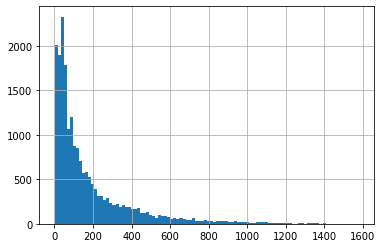

In [51]:
flat['days_exposition'].hist(bins=100)

In [52]:
flat['days_exposition'].isna().sum()

3181

Данные о длительности экспозиции содержат пропуски. Вещественный тип данных не соответствует требованиям, надо заменить на целочисленный. Есть некорректные значения (min - 1 день, max - 4 года 4 месяца)

### Вывод

Файл содержит данные о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за период с 2014 по 2019 годы. Всего 23699 объявлений. Некоторые параметры объявлений не несут ошибок. Это столбцы:  
   * 'total_images'   
   * 'last_price'   
   * 'floor'   
   * 'studio'   
   * 'open_plan'.   
Остальные данные нуждаются в проверке и корректировке:   
Столбец 'total_area' требует проверки на корректность данных из-за наличия выдающихся значений площади квартиры (min - 12 м, max - 900 м).   
Столбец 'first_day_exposition' нуждается в изменении типа данных на даты.   
Столбец 'rooms' содержит 197 некорректных записей - количество комнат в квартире указано "0".   
Столбец 'ceiling_height' содержит почти 40% пропусков и некорректные данные по высоте потолков (min - 1 м, max - 100 м).   
Столбец 'floors_total' содержит пропуски, тип данных надо поменять на целочисленный.   
Столбец 'living_area' содержит пропуски и некорректные данные о жилой площади (min - 2 м).   
Столбец 'is_apartment' содержит почти 90% пропусков, тип данных object не соответствует требуемому - bool.   
Столбец 'kitchen_area' содержит пропуски и некорректные данные площади кухни (min - 1.3 м, max - 112 м).   
Столбец 'balcony' содержит почти 50% пропусков, тип данных надо поменять на целочисленный.   
Столбец 'locality_name' содержит 49 пропусков данных о населенных пунктах.   
Столбец 'airports_nearest' содержит пропуски и одну запись с некорректными данными, где расстояние от квартиры до аэропорта равно 0 м.   
Столбец 'cityCenters_nearest' содержит пропуски. В названии столбца присутствует заглавная буква, но она нам не мешает.   
Столбец 'parks_around3000' содержит пропуски. Вещественный тип данных надо заменить на целочисленный.   
Столбец 'parks_nearest' содержит более 60% пропусков.     
Столбец 'ponds_around3000' содержит пропуски. Вещественный тип данных надо заменить на целочисленный.   
Столбец 'ponds_nearest' содержит более 60% пропусков.   
Столбец 'days_exposition'содержит пропуски. Вещественный тип данных надо заменить на целочисленный. Есть некорректные значения длительности экспозиции (min - 1 день, max - 4 года 4 месяца).

### Шаг 2. Предобработка данных

Проанализируем корректность выдающихся значений столбца 'total_area'

In [53]:
flat.query('total_area > 650')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Исходя из имеющихся данных, квартира общей площадью 900 м кв. представляется реальной недвижимостью, но с эксклюзивными параметрами. Оставим ее пока в базе данных.

In [54]:
flat.query('total_area < 15 and studio == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000.0,14.0,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


Всего обнаружено 6 квартир с общей площадью менее 15 м кв. Причем это не студии. Судя по полученным сведениям, такие квартиры действительно существуют.

Изменим тип данных столбца с датами с object на более подходящий datetime

In [55]:
flat['first_day_exposition'] = pd.to_datetime(flat['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flat['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Изучим столбец с количеством комнат, равными нулю. Всего таких 197 записей, в т.ч. 138 студий  

In [56]:
flat.query('rooms == 0 and studio == True').count()

total_images            138
last_price              138
total_area              138
first_day_exposition    138
rooms                   138
ceiling_height           72
floors_total            135
living_area             128
floor                   138
is_apartment              5
studio                  138
open_plan               138
kitchen_area              0
balcony                  80
locality_name           138
airports_nearest         87
cityCenters_nearest      87
parks_around3000         87
parks_nearest            20
ponds_around3000         87
ponds_nearest            48
days_exposition         124
dtype: int64

In [57]:
flat.query('rooms == 0 and kitchen_area > 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


В квартирах без комнат нет ни одной кухни. Для студии это логично, т.к. студия - это объединение одкой комнаты с кухней в единое пространство. Но у нас осталось еще 59 квартир без комнат, которые не названы как студии

In [58]:
flat.query('rooms == 0 and studio == False and open_plan == True').count()

total_images            59
last_price              59
total_area              59
first_day_exposition    59
rooms                   59
ceiling_height          10
floors_total            59
living_area             55
floor                   59
is_apartment             1
studio                  59
open_plan               59
kitchen_area             0
balcony                 46
locality_name           59
airports_nearest        31
cityCenters_nearest     31
parks_around3000        31
parks_nearest            9
ponds_around3000        31
ponds_nearest           21
days_exposition         59
dtype: int64

Оказывается, это 59 квартир со свободной планировкой. Значит, ошибок в параметре "0" комнат столбца 'rooms' нет

В столбце с указанием этажности дома обнаружены пропуски и вещественный тип данных

In [59]:
len(flat.query('floors_total.isna()'))

86

86 объявлений не содержат данные о количестве этажей в доме. Будем оттталкиваться от того, что этажность дома не меньше этажа квартиры, которая находится в этом доме. Заменим пропуски

In [60]:
flat['floors_total'] = flat['floors_total'].fillna(value = flat['floor'])

In [61]:
len(flat.query('floors_total.isna()'))

0

Присвоим данным целочисленный тип

In [62]:
flat['floors_total'] = flat['floors_total'].astype('int')

Обработаем данные в столбце с высотой потолков в квартирах

In [63]:
len(flat.query('ceiling_height < 2.2'))

14

Всего 14 объявлений о продаже квартир с потолками ниже 2,2 м. Так как данная высота не предназначена для проживания, лучше эти записи удалить.

In [64]:
flat = flat.query('ceiling_height.isna() or ceiling_height >= 2.2')

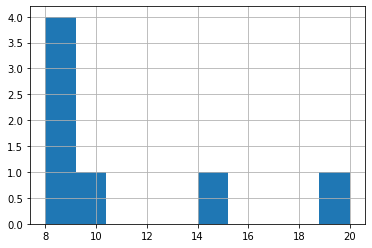

In [65]:
flat.query('22 > ceiling_height > 6')['ceiling_height'].hist()

7 записей с нереальными данными о потолках высотой от 8 до 20 метров. Тоже удалим их из таблицы 

In [66]:
flat = flat.query('ceiling_height < 6 or ceiling_height > 22 or ceiling_height.isna()')

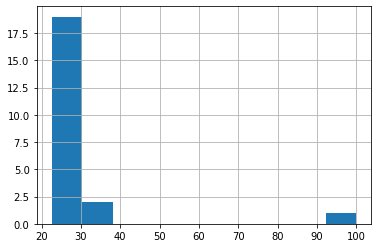

In [67]:
flat.query('ceiling_height > 22')['ceiling_height'].hist()

Объявление о квартире с потолком высотой 100 м является выбросом, т.к. во-первых это нереальные данные, а во-вторых, нет ни одного объявления в промежутке от 32 м до 100 м. Удалим его 

In [68]:
flat = flat.query('ceiling_height != 100 or ceiling_height.isna()')

В оставшихся записях логично предположить, что некорректные данные возникли из-за ручного ввода. То есть вместо высоты 2,7 м была указана высота 27 м. Исправим это

In [69]:
flat.loc[flat['ceiling_height'] > 22, ['ceiling_height']] = flat.loc[flat['ceiling_height'] > 22, ['ceiling_height']] / 10

In [70]:
flat.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Изучим пропуски в столбце 'ceiling_height' 

In [71]:
flat['ceiling_height'].isna().sum()

9195

#### Для использования в дальнейшем зависимости одного параметра квартиры от другого рассчитаем коэффициент корреляции Пирсона

In [72]:
flat.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104183,0.115040,0.099126,0.046420,0.010914,0.104511,0.031004,-0.029335,-0.024432,0.104635,0.122038,-0.002130,-0.047376,0.020683,-0.008600,-0.011441,-0.003469,-0.026817
last_price,0.104183,1.000000,0.653809,0.363449,0.394133,-0.006765,0.565858,0.026539,-0.025400,-0.008809,0.521014,0.029446,-0.026288,-0.206693,0.149957,-0.016390,0.160269,-0.084402,0.081183
total_area,0.115040,0.653809,1.000000,0.758299,0.482835,-0.075623,0.939539,-0.024782,-0.072697,-0.034908,0.609190,0.047986,-0.030753,-0.231350,0.164294,-0.021733,0.162703,-0.097968,0.149536
rooms,0.099126,0.363449,0.758299,1.000000,0.296698,-0.227187,0.846088,-0.150754,-0.147359,-0.087545,0.269924,0.017998,-0.061271,-0.184781,0.137061,-0.054880,0.093122,-0.057729,0.126687
ceiling_height,0.046420,0.394133,0.482835,0.296698,1.000000,-0.095249,0.460632,-0.047728,0.019393,0.011754,0.421376,-0.082068,-0.105013,-0.367290,0.271527,-0.059292,0.238827,-0.141275,0.131258
floors_total,0.010914,-0.006765,-0.075623,-0.227187,-0.095249,1.000000,-0.169205,0.678350,0.069571,0.050763,0.163508,0.194042,0.107262,0.019091,-0.252551,0.096695,-0.123460,0.039379,-0.052473
living_area,0.104511,0.565858,0.939539,0.846088,0.460632,-0.169205,1.000000,-0.097238,-0.056282,-0.033742,0.428767,0.018836,-0.057984,-0.231228,0.183851,-0.050483,0.149376,-0.081521,0.142304
floor,0.031004,0.026539,-0.024782,-0.150754,-0.047728,0.678350,-0.097238,1.000000,0.036957,0.035840,0.135462,0.168752,0.071807,0.009071,-0.164065,0.072929,-0.076441,0.024708,-0.039192
studio,-0.029335,-0.025400,-0.072697,-0.147359,0.019393,0.069571,-0.056282,0.036957,1.000000,-0.004239,NaN,0.031543,-0.021887,-0.007030,-0.030198,0.009141,0.000956,0.002570,-0.022488
open_plan,-0.024432,-0.008809,-0.034908,-0.087545,0.011754,0.050763,-0.033742,0.035840,-0.004239,1.000000,NaN,0.019552,-0.013591,-0.004205,-0.010070,0.010618,0.008470,-0.003356,-0.024123


Самый большой коэффициент корреляции 0,48 между высотой потолков и общей площадью квартиры.   
Сгруппируем квартиры по размеру общей площади.  

In [73]:
def total_area_group(row):
    area = row['total_area']
    if area <= 50:
        return 50
    if 50 < area <= 100:
        return 100
    if 100 < area <= 200:
        return 200
    if 200 < area <= 300:
        return 300
    if 300 < area <= 400:
        return 400
    if 400 < area <= 500:
        return 500
    if 500 < area <= 600:
        return 600
    return 900

flat['total_area_groups'] = flat.apply(total_area_group, axis=1)
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,200
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,50
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,100
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,200
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100


Рассчитаем среднюю высоту потолков для квартир в зависимости от общей площади и заполним пропуски

In [74]:
def ceiling_height_mean(area):
    mean_height = flat[flat['total_area_groups'] == area]['ceiling_height'].mean()
    flat.loc[(flat['total_area_groups'] == area) & (flat['ceiling_height'].isna()), 'ceiling_height'] = mean_height
for area in flat['total_area_groups'].unique():
    ceiling_height_mean(area)

In [75]:
flat[flat['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups


Обработаем столбец с отсутствующими данными по жилой площади квартир

In [76]:
flat['living_area'].isna().sum()

1901

Самый высокий коэффициент корреляции 0.98 у жилой площади с общей площадью. Рассчитаем среднюю жилую площадь для квартир в зависимости от общей площади и заполним пропуски

In [77]:
def living_area_mean(area):
    mean_area = flat[flat['total_area_groups'] == area]['living_area'].mean()
    flat.loc[(flat['total_area_groups'] == area) & (flat['living_area'].isna()), 'living_area'] = mean_area
for area in flat['total_area_groups'].unique():
    living_area_mean(area)

In [78]:
flat['living_area'].isna().sum()

0

В столбце 'is_apartment' изменим тип данных, обработаем пропуски

In [79]:
flat['is_apartment'].describe()

count      2772
unique        2
top       False
freq       2723
Name: is_apartment, dtype: object

Скорее всего, незаполненные данные в столбце 'is_apartment' означают, что квартира не является апартаментами. Во-первых, апартаментов на вторичном рынке недвижимости действительно гораздо меньше квартир. Во-вторых, люди часто не заполняют параметры объявлений, которые не имеют отношения к продаваемой квартире. Поэтому заменим пропуски на False.

In [80]:
flat['is_apartment'] = flat['is_apartment'].fillna(value = 0)

In [81]:
flat['is_apartment'] = flat['is_apartment'].astype('bool')

Обработаем столбец с площадью кухни 'kitchen_area'. Удалим пропуски и проанализируем выдающиеся значения

In [82]:
flat['kitchen_area'].isna().sum()

2274

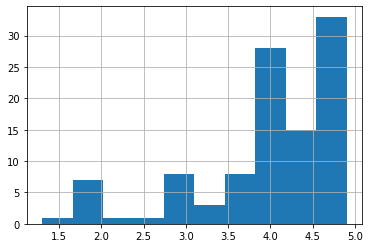

In [83]:
flat.query('kitchen_area < 5')['kitchen_area'].hist()

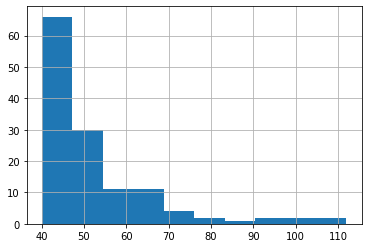

In [84]:
flat.query('kitchen_area > 40')['kitchen_area'].hist()

По гистограммам видно, что минимальные и максимальные значения площади кухни не оторваны от остальных значений. 

In [85]:
flat.query('kitchen_area.isna() and rooms == 0').count()

total_images            197
last_price              197
total_area              197
first_day_exposition    197
rooms                   197
ceiling_height          197
floors_total            197
living_area             197
floor                   197
is_apartment            197
studio                  197
open_plan               197
kitchen_area              0
balcony                 126
locality_name           197
airports_nearest        118
cityCenters_nearest     118
parks_around3000        118
parks_nearest            29
ponds_around3000        118
ponds_nearest            69
days_exposition         183
total_area_groups       197
dtype: int64

Мы уже выяснили, что 197 записей содержат информацию о квартирах-студиях и квартирах со свободной планировкой. Заменим в них пропуски в площади кухни на нулевые значения 

In [86]:
flat.loc[flat['rooms'] == 0, ['kitchen_area']] = 0

In [87]:
flat['kitchen_area'].isna().sum()

2077

Самый высокий коэффициент корреляции 0.61 площади кухни с общей площадью квартиры. Рассчитаем среднюю площадь кухни в зависимости от общей площади и заполним пропуски

In [88]:
def kitchen_area_mean(area):
    mean_kitchen = flat[flat['total_area_groups'] == area]['kitchen_area'].mean()
    flat.loc[(flat['total_area_groups'] == area) & (flat['kitchen_area'].isna()), 'kitchen_area'] = mean_kitchen
for area in flat['total_area_groups'].unique():
    kitchen_area_mean(area)

In [89]:
flat['kitchen_area'].isna().sum()

0

Избавимся от пропусков в столбце с указанием количества балконов в квартире и изменим тип данных на целочисленный

In [90]:
flat['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Скорее всего, пропуски возникли по той же причине, что и пропуски данных в столбце 'is_apartment'. Люди просто не заполняют те поля в объявлении, для которых у них нет данных. Значит, пропуски в столбце можно заменить на значение 0.

In [91]:
flat['balcony'] = flat['balcony'].fillna(value=0)

In [92]:
flat['balcony'] = flat['balcony'].astype('int')

Проанализируем пропущеные значения в столбце с названием населенного пункта. Их всего 49

In [93]:
flat['locality_name'].isna().sum()

49

In [94]:
flat['locality_name'] = flat['locality_name'].fillna(value='неизвестно')

Для пропущенных данных в названии населенного пункта невозможно подобрать логическую замену. Поэтому укажем вместо пропусков параметр "неизвестно". Удалять эти объявления тоже не будем, т.к. они пригодятся нам для анализа рынка недвижимости по другим параметрам.

Проанализируем данные столбца 'airports_nearest' о расстоянии от квартиры до ближайшего аэропорта. У нас 5532 пропуска. 

In [95]:
flat['airports_nearest'].isna().sum()

5532

Еще в таблице была одна ошибка в объявлении, где указано нулевое расстояние от квартиры до аэропорта. Исправим это

In [96]:
flat.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,50


In [97]:
spb = flat[flat['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()
flat.loc[flat['airports_nearest'] == 0, 'airports_nearest'] = spb

In [98]:
flat.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_groups


Так как в Ленинградской области один аэропорт, то оставшиеся пропуски заменим медианным значением расстояния до аэропорта

In [99]:
median_airport = flat['airports_nearest'].median()
flat['airports_nearest'] = flat['airports_nearest'].fillna(value=median_airport)

Проанализируем пропуски в столбце с указанием расстояния до центра города

In [100]:
flat['cityCenters_nearest'].isna().sum()

5509

Так как в Ленинградской области только один центр города - это центр Санкт-Петербурга, используем медианное значение расстояния для заполнения пропусков

In [101]:
median_city = flat['cityCenters_nearest'].median()
flat['cityCenters_nearest'] = flat['cityCenters_nearest'].fillna(value=median_city)

Для замены пропусков в столбце с указанием количества парков в радиусе 3 км применим также медианное значение

In [102]:
median_park = flat['parks_around3000'].median()
flat['parks_around3000'] = flat['parks_around3000'].fillna(value=median_park)

Заменим тип данных на целочисленный

In [103]:
flat['parks_around3000'] = flat['parks_around3000'].astype('int')

Для замены пропусков в столбце с указанием расстояния до ближайшего парка применим медианное значение

In [104]:
median_to_park = flat['parks_nearest'].median()
flat['parks_nearest'] = flat['parks_nearest'].fillna(value=median_to_park)

Для замены пропусков в столбце с указанием количества водоемов в радиусе 3 км применим также медианное значение

In [105]:
median_pond = flat['ponds_around3000'].median()
flat['ponds_around3000'] = flat['ponds_around3000'].fillna(value=median_pond)

Заменим тип данных на целочисленный

In [106]:
flat['ponds_around3000'] = flat['ponds_around3000'].astype('int')

Для замены пропусков в столбце с указанием расстояния до ближайшего водоема применим медианное значение

In [107]:
median_to_pond = flat['ponds_nearest'].median()
flat['ponds_nearest'] = flat['ponds_nearest'].fillna(value=median_to_pond)

Длительность экспозиции - важный рыночный параметр квартиры и его надо сохранить. Так как он не коррелирует ни с одним из других параметров и количество пропусков составляет всего 13%, медианное значение является самым оптимальным вариантом для заполнения пропусков данных по длительности экспозиции квартиры

In [108]:
median_expo = flat['days_exposition'].median()
flat['days_exposition'] = flat['days_exposition'].fillna(value=median_expo)

Заменим тип данных на целочисленный

In [109]:
flat['days_exposition'] = flat['days_exposition'].astype('int')

Восстановим порядок индексации в таблице

In [110]:
flat = flat.reset_index(drop = True)

Проверим данные на наличие дубликатов

In [111]:
flat.duplicated().sum()

0

### Вывод

Столбец 'total_area' с минимальными и максимальными значениями содержит данные о действительно существующих квартирах.   
В столбце 'first_day_exposition' изменили тип данных столбца на datetime.   
Выяснили, что столбец 'rooms' содержит корректные данные.  
В столбце 'floors_total' избавились от пропусков, привели данные к целочисленному типу.   
В столбце 'ceiling_height' избавились от некорректных данных и пропусков.   
В столбце 'living_area' избавились от пропусков.   
В столбце 'is_apartment' изменили тип данных на bool, избавились от пропусков.   
Столбец 'kitchen_area' очистили от пропусков, проанализировали выдающиеся значения.   
Столбец 'balcony' очистили от пропусков, изменили тип на целочисленный.   
В столбце 'locality_name' пропуски заменили на значение "неизвестно".   
В столбцах 'airport_nearest' и 'cityCenters_nearest' избавились от пропусков.   
Столбцы 'parks_around3000' и 'ponds_around3000' очистили от пропусков, изменили тип на целочисленный.   
Столбцы 'parks_nearest' и 'ponds_nearest' очистили от пропусков.   
Столбец 'days_exposition' очистили от пропусков, изменили тип данных.

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем цену квадратного метра квартиры. Это отношение цены квартиры 'last_price' к ее общему метражу 'total_area'

In [112]:
flat['price_per_meter'] = flat['last_price'] / flat['total_area']

Добавим столбцы с днем недели, месяцем и годом публикации объявления

In [113]:
flat['weekday'] = flat['first_day_exposition'].dt.weekday
flat['month'] = pd.DatetimeIndex(flat['first_day_exposition']).month
flat['year'] = pd.DatetimeIndex(flat['first_day_exposition']).year

Сгруппируем квартиры по этажам по группам: первый этаж, последний этаж, другой  

In [114]:
def floors(row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    return 'другой'

flat['floor_groups'] = flat.apply(floors, axis=1)    

In [115]:
flat['floor_groups'].value_counts()

другой       17348
последний     3415
первый        2913
Name: floor_groups, dtype: int64

Добавим столбец с отношением жилой площади к общей площади квартиры

In [116]:
flat['living_to_total'] = flat['living_area'] / flat['total_area']

Добавим столбец с отношением площади кухни к общей площади квартиры

In [117]:
flat['kitchen_to_total'] = flat['kitchen_area'] / flat['total_area']

In [118]:
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_groups,price_per_meter,weekday,month,year,floor_groups,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,...,755.0,95,200,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.636126,11,18.600000,1,False,...,502.5,81,50,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.746363,5,34.300000,4,False,...,574.0,558,100,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,3.053804,14,75.136137,9,False,...,234.0,424,200,408176.100629,4,7,2015,другой,0.472554,0.122079
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,...,48.0,121,100,100000.000000,1,6,2018,другой,0.320000,0.410000


### Вывод

Данные в таблице сгруппировали по величине общей площади квартиры и по ее этажу в доме (первый, последний, другой).   
Для каждого объявления отобразили день недели, месяц и год его публикации.   
Добавили дополнительные параметры квартир:   
   * цена квадратного метра   
   * отношение жилой площади к общей   
   * отношение площади кухни к общей площади   

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим основные параметры квартир

Изучим общую площадь продаваемых квартир

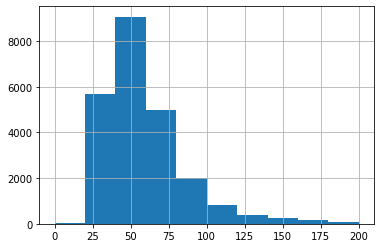

In [119]:
flat['total_area'].hist(range=(0,200))

(0, 150)

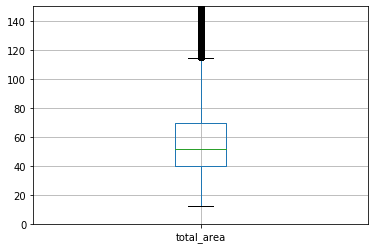

In [120]:
flat.boxplot(column='total_area')
plt.ylim(0, 150)

In [121]:
flat['total_area'].describe()

count    23676.000000
mean        60.354395
std         35.656115
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Видно, что медианное значение площади продаваемых квартир 52 м кв.   
Средяя площадь 60 м кв. близка к медианной.   
На размер стандартного отклонения 35 м кв. влияет длинный хвост высоких значений в диаграмме размаха, т.е. большое количество квартир, являющихся выбросами.   
Площадь основной массы продаваемых квартир находится в диапазоне от 12 до 115 м кв.    
50% квартир составляют квартиры с площадью от 40 до 70 м кв. Квартиры, площадью более 115 м кв. являются выбросом

Изучим распределение цены за квадратный метр

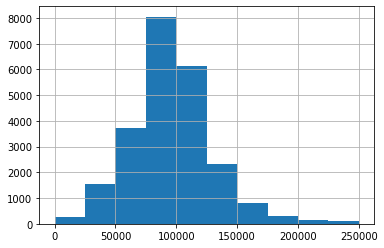

In [122]:
flat['price_per_meter'].hist(range=(0, 250000))

(0, 200000)

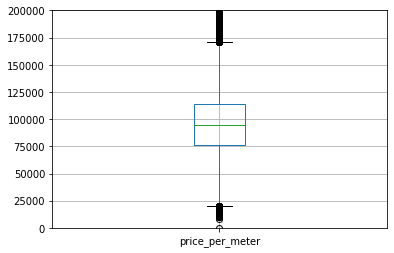

In [123]:
flat.boxplot(column='price_per_meter')
plt.ylim(0, 200000)

In [124]:
flat['price_per_meter'].describe()

count    2.367600e+04
mean     9.939726e+04
std      5.009251e+04
min      1.118349e+02
25%      7.663884e+04
50%      9.500000e+04
75%      1.142593e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

Минимальное значение цены за м кв. 112 руб.
Медиана цены 95000 руб.   
Среднее значение почти 99400 руб., близко к медиане.   
Стандартное отклонение цены за м кв. чуть более 50000 руб.   
Нормальное распределение цены находится в границах от 20000 руб. за м кв. до 170000 руб. за м кв.    
50% квартир на рынке имеют цену за м кв. от 76600 руб. до 114000 руб.   
Квартиры, чья цена за метр квадратный превышает 170000 рублей или менее 20000 рублей, являются выбросом.

Изучим распределение цен на квартиры

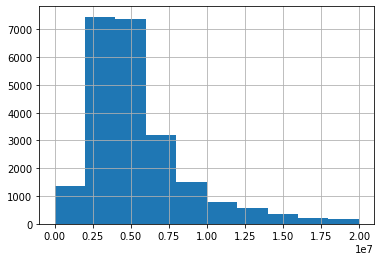

In [125]:
flat['last_price'].hist(range=(0,20000000))

(-1000000, 15000000)

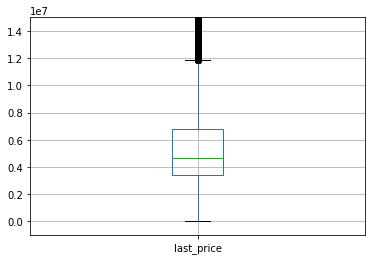

In [126]:
flat.boxplot(column='last_price')
plt.ylim(-1000000, 15000000)

In [127]:
flat['last_price'].describe()

count    2.367600e+04
mean     6.538706e+06
std      1.086709e+07
min      1.219000e+04
25%      3.407500e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная цена квартиры, выставленной на продажу, составила всего 12190 руб.   
Медиана стоимости квартиры 4.65 млн руб.   
Средняя цена 6.54 млн руб.   
Стандартное отклонение почти в 11 млн руб. очень высокое.   
50% продаваемых квартир стоят от 3,4 млн до 6,8 млн руб. Квартиры, стоимостью более 12 млн. руб. являются выбросом

Изучим число комнат продаваемых квартир

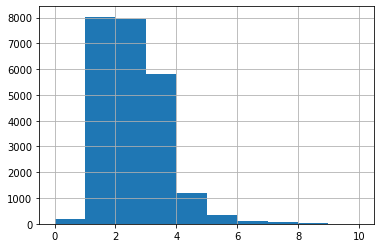

In [128]:
flat['rooms'].hist(range=(0, 10))

(-1, 10)

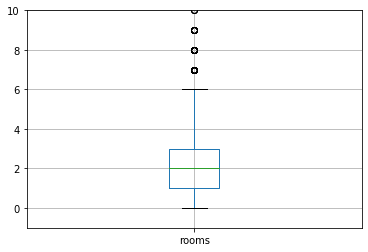

In [129]:
flat.boxplot(column='rooms')
plt.ylim(-1, 10)

In [130]:
flat['rooms'].describe()

count    23676.000000
mean         2.070873
std          1.078524
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Основная масся представленных на рынке квартир содержит от 0 до 6 комнат.    
Медианное значение и среднее значение совпадают и равны 2 комнаты.   
Стандартное отклонение невелико.   
50% продаваемых квартир приходится на одно-, двух- и трехкомнатные квартиры. Также достаточно много продается четырехкомнатных квартир. Квартиры более чем с 6-ю комнатами являются выбросом

Изучим высоту потолков продаваемых квартир

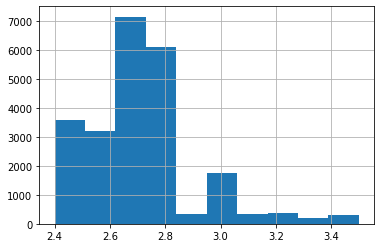

In [131]:
flat['ceiling_height'].hist(range=(2.4, 3.5))

(2.2, 3.2)

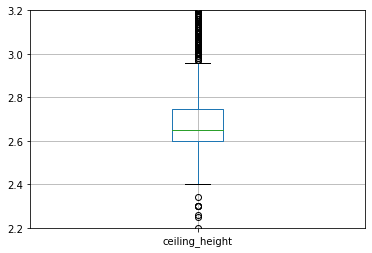

In [132]:
flat.boxplot(column='ceiling_height')
plt.ylim(2.2, 3.2)

In [133]:
flat['ceiling_height'].describe()

count    23676.000000
mean         2.721693
std          0.229186
min          2.200000
25%          2.600000
50%          2.650000
75%          2.746363
max          5.800000
Name: ceiling_height, dtype: float64

Нормальное распределение высоты потолков квартир, выставленных на продажу, от 2.4 м до почти 3 м.    
50% квартир имеют высоту потолка от 2.6 м до 2.75 м.    
Медианное значение 2.65 м. Средняя высота потолка 2.72 м близка к медианной.   
Стандартное отклонение невелико.   
Квартиры с высотой потолка менее 2.4 м и более 3 м являются выбросом

Изучим время продажи квартиры

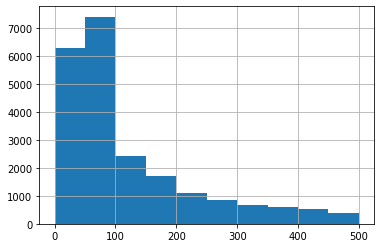

In [134]:
flat['days_exposition'].hist(range=(0, 500))

(-50, 500)

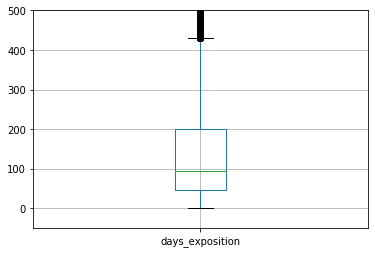

In [135]:
flat.boxplot(column='days_exposition')
plt.ylim(-50, 500)

In [136]:
flat['days_exposition'].describe()

count    23676.000000
mean       169.382117
std        206.591292
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Результаты анализа

Среднее время продажи квартиры 169 дней, почти полгода.   
Медианное значение продажи квартиры составляет 95 дней, то есть три месяца.   
Медиана почти в два раза меньше среднего времени. Среднее время так увеличилось из-за длинного хвоста высоких значений в диаграмме размаха - большого количества очень долгих продаж, длящихся более 420 дней (1 год и 2 месяца).   
Стандартное отклонение большое, почти 207 дней. Значит данные по длительности экспозиции квартиры неоднородны. Это может быть следствием большого количества выбросов, либо в данных есть аномалии.   
Обычно продажа квартиры занимает от 45 до 199 дней.   
Соответственно, можно считать, что квартира продалась очень быстро, если продажа заняла менее 45 дней.   
И можно считать, что квартира продавалась очень медленно, если продажа заняла 200 и более дней.

#### Избавимся от выбросов

Уберем редкие и выбивающиеся значения в данных по общей площади квартиры

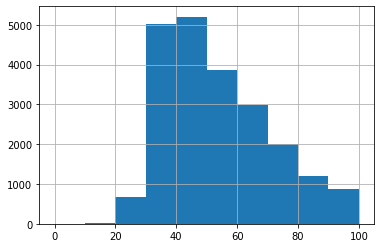

In [137]:
flat['total_area'].hist(range=(0, 100))

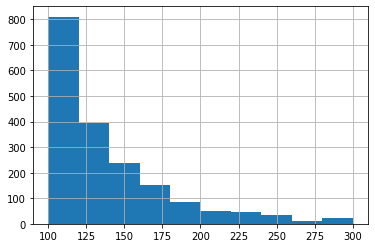

In [138]:
flat['total_area'].hist(range=(100, 300))

Основываясь на показателях гистограмм, оставим для анализа выборку чуть превышающую нормальное распределение, квартиры с площадью от 20 м кв. до 150 м кв. 

In [139]:
flat_final = flat.query('20 <= total_area <= 150')
len(flat_final)

23086

Уберем редкие и выбивающиеся значения в данных по цене  квадратного метра квартиры

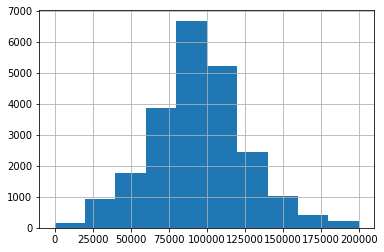

In [140]:
flat_final['price_per_meter'].hist(range=(0, 200000))

Основываясь на показателях гистограммы, оставим для анализа квартиры с ценой за м кв. в пределах от 20000 руб. до 175000 руб. 

In [141]:
ff = flat_final.query('20000 <= price_per_meter <= 175000')
len(ff)

22257

Уберем редкие и выбивающиеся значения в данных по стоимости квартиры

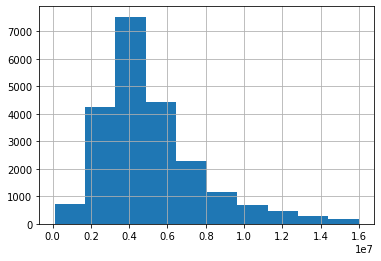

In [142]:
ff['last_price'].hist(range=(100000,16000000))

Основываясь на показателях гистограммы, оставим для анализа квартиры с ценой в пределах от 0.5 млн руб. до 12 млн руб.

In [143]:
ff = flat_final.query('500000 <= last_price <= 12000000')
len(ff)

21677

Уберем редкие и выбивающиеся значения в данных по количеству комнат в квартире

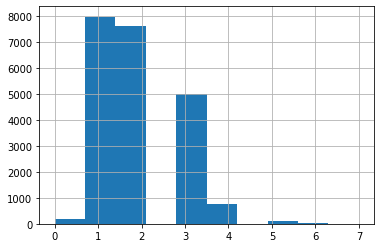

In [144]:
ff['rooms'].hist()

In [145]:
ff['rooms'].describe()

count    21677.000000
mean         1.936154
std          0.912676
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Если сравнить данные по столбцу 'rooms' первоначальной таблицы flat и таблицы ff, очищенной от редких значений, то у нас исчезли квартиры с количеством комнат от 8 до 19 включительно. Медиана осталась прежней, среднее значение незначительно уменьшилось.   
Оставим в выборке квартиры с количеством комнат, соответствующему нормальному распределению, от 0 до 6.

In [146]:
ff = ff.query('rooms < 7')
len(ff)

21676

Уберем редкие и выбивающиеся значения в данных по высоте потолков квартиры

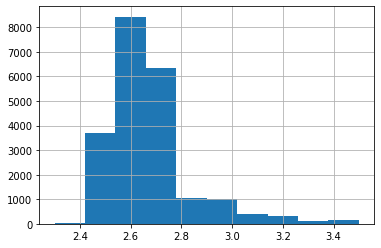

In [147]:
ff['ceiling_height'].hist(range=(2.3, 3.5))

Основываясь на параметрах гистограммы, оставим в выборке квартиры с высотой потолка от 2.4 м до 3.0 м

In [148]:
ff = ff.query('2.4 <= ceiling_height <= 3.0')

In [149]:
len(ff)

20571

Уберем редкие и выбивающиеся значения в данных по времени продажи квартиры

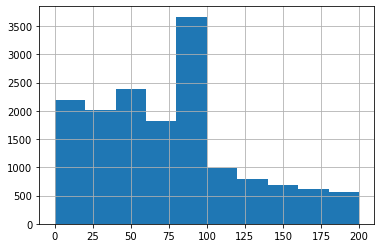

In [150]:
ff['days_exposition'].hist(range=(0, 200))

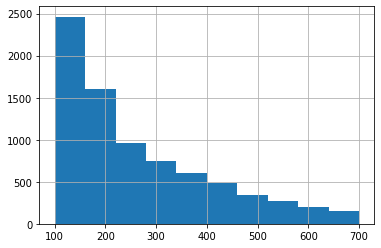

In [151]:
ff['days_exposition'].hist(range=(100, 700))

Основываясь на показателях гистограммы, оставим в выборке данные чуть больше нормального распределения по длительности продаж квартир, 450 дней

In [152]:
ff = ff.query('days_exposition < 450')
len(ff)

18895

Посмотрим на показатели медианы, среднего значения и стандартного отклонения полученной выборки

In [153]:
ff['total_area'].describe()

count    18895.000000
mean        51.759345
std         17.224342
min         20.000000
25%         38.400000
50%         48.000000
75%         62.000000
max        147.800000
Name: total_area, dtype: float64

In [154]:
ff['price_per_meter'].describe()

count     18895.000000
mean      91644.358092
std       29471.692891
min        9615.384615
25%       74288.099213
50%       92378.752887
75%      108959.938367
max      387096.774194
Name: price_per_meter, dtype: float64

In [155]:
ff['last_price'].describe()

count    1.889500e+04
mean     4.700740e+06
std      2.127263e+06
min      5.000000e+05
25%      3.290000e+06
50%      4.300000e+06
75%      5.790000e+06
max      1.200000e+07
Name: last_price, dtype: float64

In [156]:
ff['rooms'].describe()

count    18895.000000
mean         1.883091
std          0.876300
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [157]:
ff['ceiling_height'].describe()

count    18895.000000
mean         2.658666
std          0.117405
min          2.400000
25%          2.600000
50%          2.636126
75%          2.746363
max          3.000000
Name: ceiling_height, dtype: float64

In [158]:
ff['days_exposition'].describe()

count    18895.000000
mean       113.557290
std        100.746764
min          1.000000
25%         45.000000
50%         95.000000
75%        147.000000
max        449.000000
Name: days_exposition, dtype: float64

#### Результаты очистки данных

Параметры медианы и среднего значения по столбцу 'total_area' выровнялись, стандартное отклонение уменьшилось в два раза: с 35 м кв. до 17 м кв.  
Медиана и среднее значение по столбцу 'price_per_meter' выровнялись, стандартное отклонение уменьшилось с 50000 руб. до 29500 руб.   
Показатель среднего значения по столбцу 'last_price' уменьшился с 6.5 млн руб. до 4.7 млн руб. и приблизился к медиане. А стандартное отклонение в 11 млн руб. уменьшилось почти в пять раз: до 2.2 млн руб.   
Показатели медианы, среднего значения и стандартного отклонения столбца 'rooms' были корректными и почти не изменились.   
Показатели медианы и среднего значения столбца 'ceiling_height' выровнялись, стандартное отклонение уменьшилось в два раза: с 0.22 м до 0.11 м.  
Среднее значение столбца 'days_exposition' уменьшилось со 169 до 113 дней и приблизилось к медиане, а стандартное отклонение уменьшилось в два раза: до 100 дней.   
Как видно, очистив выборку от редких и выбивающихся значений, мы получили корректные для анализа данные.  

#### Поиск факторов, влияющих на стоимость квартир

Восстановим порядок индексации в таблице

In [159]:
ff = ff.reset_index(drop = True)

Проанализируем какие факторы более всего влияют на стоимость квартиры

Посмотрим на зависимость стоимости квартиры от величины общей площади квартиры

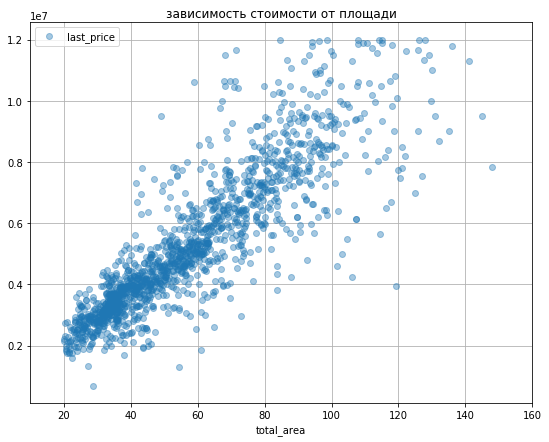

In [160]:
(ff.pivot_table(index='total_area', values='last_price')
 .plot(title='зависимость стоимости от площади', style='o', alpha=0.4, xlim=(10, 160), figsize=(9, 7), grid=True))

In [161]:
ff['last_price'].corr(ff['total_area'])

0.681404381359831

По сравнению с коэффициентом корреляции данных из таблицы flat, коэффициент вырос с 0.65 до 0.68. Это означает улучшение качества данных в таблице ff и указывает на высокую зависимость стоимости квартиры от ее площади.   
На графике видна линейная зависимость и отдельные разбросы (это и влияет на величину стандартного отклонения в стоимости квартиры).   
В основном, рост площади квартиры напрямую влияет на рост ее цены

Посмотрим на зависимость стоимости квартиры от числа комнат

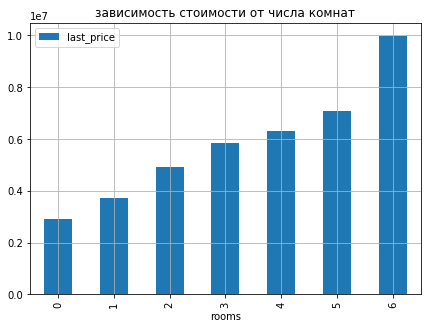

In [162]:
(ff.pivot_table(index='rooms', values='last_price')
 .plot(title='зависимость стоимости от числа комнат', kind='bar', figsize=(7, 5), grid=True))

In [163]:
ff['last_price'].corr(ff['rooms'])

0.4175278935036074

Коэффициент корреляции Пирсона 0.42 указывает на прямую зависимость цены квартиры от количества комнат, хотя и не такую сильную, как от ее площади. График подтверждает наличие прямой зависимости.

Посмотрим на зависимость цены квадратного метра квартиры от числа комнат

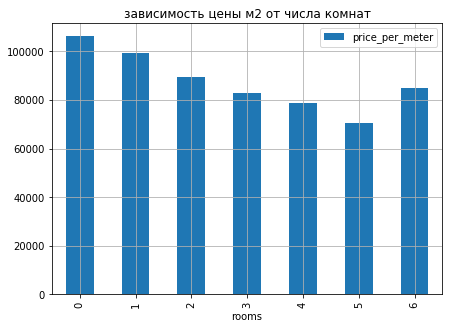

In [164]:
(ff.pivot_table(index='rooms', values='price_per_meter')
 .plot(title='зависимость цены м2 от числа комнат', kind='bar', figsize=(7, 5), grid=True))

Можно сделать вывод, что стоимость квадратного метра уменьшается при увеличении количества комнат в квартире. Но в 6-ти комнатных квартирах стоимость за м2 снова растет. 

Рассмотрим зависимость цены квадратного метра квартиры от ее удаленности от центра города

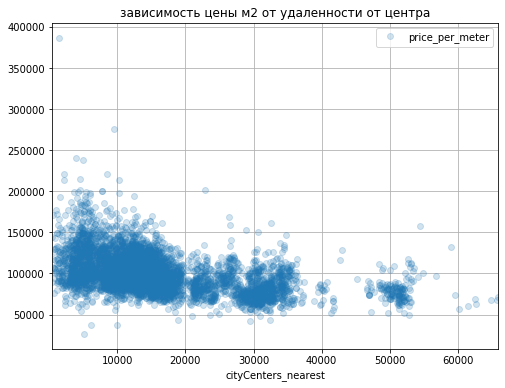

In [165]:
(ff.pivot_table(index='cityCenters_nearest', values='price_per_meter')
 .plot(title='зависимость цены м2 от удаленности от центра', style='o', alpha=0.2, figsize=(8, 6), grid=True))

Как видно из графика, количество предложений и размер цены квадратного метра квартиры можно разбить на группы: 0-20 км, 20-40 км и 40 км и более, - по удаленности от центра города

Изучим зависимость цены квадратного метра от того, на каком этаже расположена квартира: первом, последнем или другом

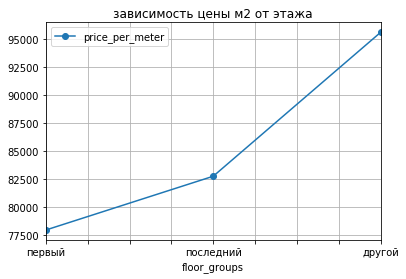

In [166]:
(ff.pivot_table(index='floor_groups', values='price_per_meter').sort_values(by='price_per_meter')
 .plot(title='зависимость цены м2 от этажа',style='o-', figsize=(6, 4), grid=True))

Как видно из графика, цена м кв. у квартир на первом этаже самая низкая, цена м кв. квартир на последнем этаже имеет среднее значение. Самая высокая цена м кв. у квартир из группы "другой" - это не первый и не последний этаж дома

Проанализируем зависимость цены квадратного метра квартиры от даты размещения объявления: дня недели, месяца и года

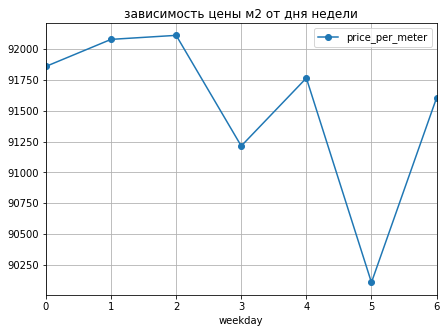

In [167]:
(ff.pivot_table(index='weekday', values='price_per_meter').sort_values(by='weekday')
 .plot(title='зависимость цены м2 от дня недели',style='o-', figsize=(7, 5), grid=True))

Исходя из графика видно, что объявления, опубликованные во вторник-среду, содержат самую высокую стоимость метра кв. квартир. А объявления, опубликованные в субботу - самую низкую стоимость метра кв.

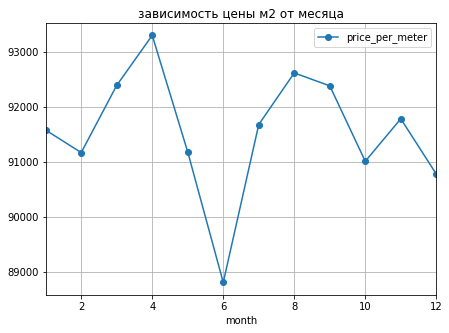

In [168]:
(ff.pivot_table(index='month', values='price_per_meter').sort_values(by='month')
 .plot(title='зависимость цены м2 от месяца',style='o-', figsize=(7, 5), grid=True))

Исходя из графика видно, что объявления в апреле содержат самую высокую цену м кв. квартиры. А июньские объявления содержат самую низкую цену м кв. квартиры

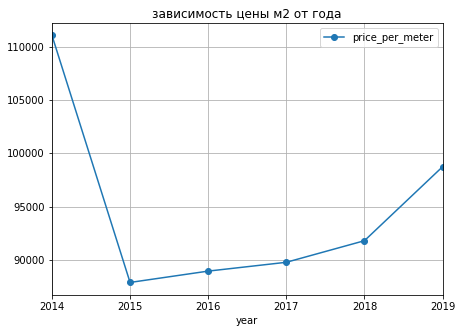

In [169]:
(ff.pivot_table(index='year', values='price_per_meter').sort_values(by='year')
 .plot(title='зависимость цены м2 от года',style='o-', figsize=(7, 5), grid=True))

Исходя из графика видно, что самые дорогие квартиры были в 2014 году. С 2015 года начался рост стоимости квартир. Самые низкие цены на квартиры держались в период с 2015 по 2017 г.г.

#### Результаты анализа

Подводя промежуточный итог, можно сказать, что полная стоимость квартиры напрямую зависит от ее прощади и количества комнат.   
На величину цены квадратного метра квартиры влияет:   
   * на каком этаже находится квартира. Самая высокая цена м кв. у квартир не на первом и не на последнем этажах   
   * день подачи объявления. Самая низкая цена м кв. у квартир, объявление о которых было подано в субботу   
   * месяц подачи объявления. Самая низкая цена м кв. у июньских квартир   
   * год подачи объявления. Самая высокая цена м кв. в 2014 году ,самая низкая - в 2015 г.   

С увеличением числа комнат в квартире стоимость квадратного метра снижается.   
Зависимость цены м кв. от удаленности от центра города отсутствует.  

#### Анализ стоимости квартир. Продолжение

Найдем 10 населенных пунктов с наибольшим числом объявлений и создадим из них словарь

In [170]:
ff['locality_name'].value_counts().head(10)

Санкт-Петербург      11812
посёлок Мурино         482
посёлок Шушары         406
Всеволожск             353
Колпино                306
посёлок Парголово      305
Пушкин                 296
Гатчина                271
деревня Кудрово        262
Выборг                 196
Name: locality_name, dtype: int64

In [171]:
dict = ff['locality_name'].value_counts().head(10).index
dict

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Колпино', 'посёлок Парголово', 'Пушкин', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object')

Вычислим среднюю цену квадратного метра в этих населённых пунктах.   
Найдем населённые пункты с самой высокой и самой низкой стоимостью жилья

In [172]:
(ff.query('locality_name in @dict')
 .pivot_table(index='locality_name', values='price_per_meter').sort_values(by='price_per_meter', ascending=False))

,price_per_meter
locality_name,
Санкт-Петербург,105527.696779
Пушкин,99723.673294
деревня Кудрово,92584.513561
посёлок Парголово,90091.670964
посёлок Мурино,86016.232558
посёлок Шушары,78591.446121
Колпино,75178.115817
Гатчина,68632.299833
Всеволожск,67274.111916


В Санкт-Петербурге самая высокая стоимость квадратного метра жилья, 105528 руб.   
В Выборге самая низкая стоимость квадратного метра жилья, 57737 руб.

Проанализируем зависимость стоимости жилья от расстояния до центра

Создадим столбец с указанием расстояния до центра в километрах

In [173]:
ff['cityCenters_km'] = (ff['cityCenters_nearest'] / 1000).round().astype('int')

Посмотрим на зависимость средней цены квадратного метра от расстояния до центра в км

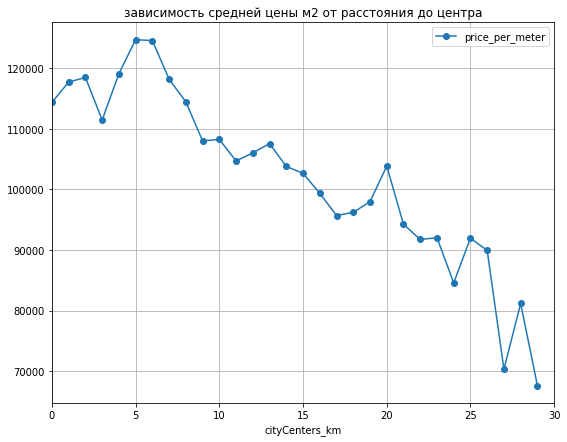

In [174]:
(ff.query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_km', values='price_per_meter')
 .plot(title='зависимость средней цены м2 от расстояния до центра', style='o-', xlim=(0, 30), figsize=(9, 7), grid=True))

Посмотрим на зависимость цены квадратного метра от расстояния до центра в км

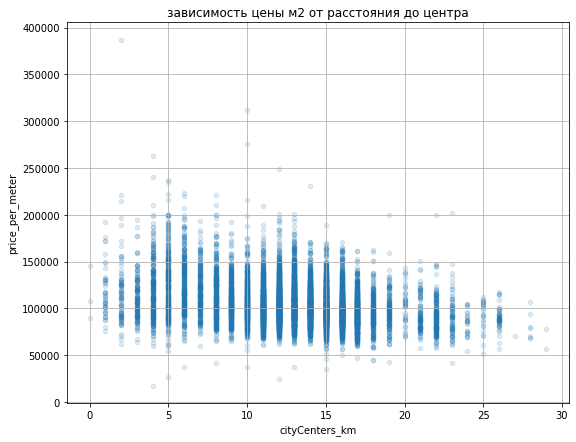

In [175]:
(ff.query('locality_name == "Санкт-Петербург"')
  .plot(x='cityCenters_km', y='price_per_meter', kind='scatter', alpha=0.15, title='зависимость цены м2 от расстояния до центра', figsize=(9, 7), grid=True))

Посмотрим на зависимость цены квадратного метра от расстояния до центра в метрах

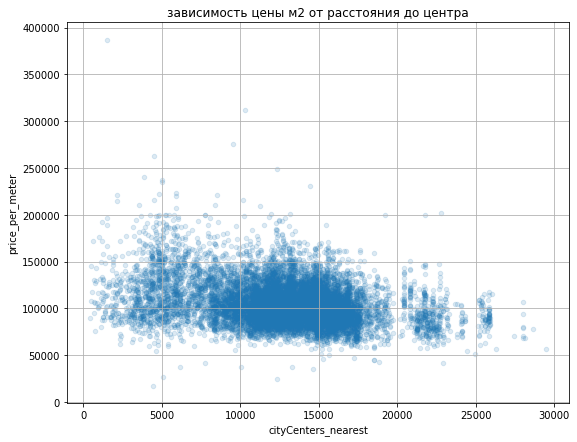

In [176]:
(ff.query('locality_name == "Санкт-Петербург"')
  .plot(x='cityCenters_nearest', y='price_per_meter', kind='scatter', alpha=0.15, title='зависимость цены м2 от расстояния до центра', figsize=(9, 7), grid=True))

#### Результаты анализа

В результате анализа показателей графиков можно выделить три основные ценовые группы в зависимости от расстояния до центра города:   
   * центральная - это центр города, самый дорогой сегмент, от 0 до 9 км   
   * средняя - самая массовая группа, от 9 до 20 км
   * окраина города - самая малочисленная, дешевая и удаленная от центра, от 20 до 30 км

#### Анализ стоимости квартир центра Санкт-Петербурга

Проанализируем квартиры из полученной центральной группы также, как мы анализировали все объявления Санкт-Петербурга и Ленинградской области

In [177]:
spb = flat.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 9000')
len(spb)

4379

Изучим общую площадь продаваемых квартир в центре города

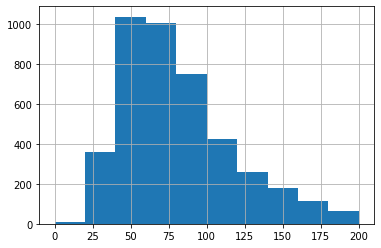

In [178]:
spb['total_area'].hist(range=(0, 200))

(0, 200)

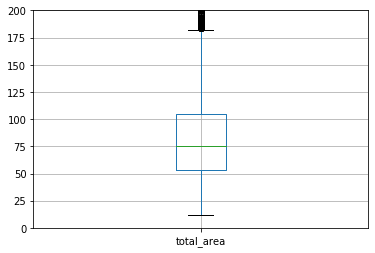

In [179]:
spb.boxplot(column='total_area')
plt.ylim(0, 200)

In [180]:
spb['total_area'].describe()

count    4379.000000
mean       88.561996
std        57.922111
min        12.000000
25%        53.250000
50%        75.000000
75%       104.780000
max       900.000000
Name: total_area, dtype: float64

Медиана общей площади 75 м кв.    
Среднее значение 88.5 м кв.    
Стандартное отклонение очень большое 58 м кв.    
50% квартир имеют площадь от 53 до 105 м кв.    
Нормальное распределение от 12 до 180 м кв.

Изучим цену квадратного метра квартир в центре города

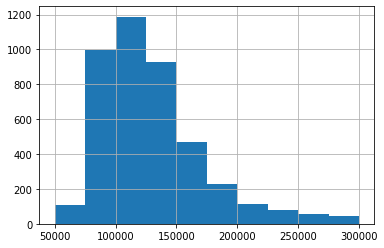

In [181]:
spb['price_per_meter'].hist(range=(50000, 300000))

(0, 250000)

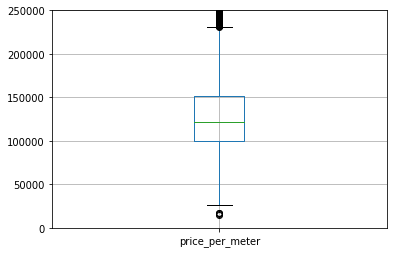

In [182]:
spb.boxplot(column='price_per_meter')
plt.ylim(0, 250000)

In [183]:
spb['price_per_meter'].describe()

count    4.379000e+03
mean     1.405450e+05
std      8.562049e+04
min      1.534527e+04
25%      9.960193e+04
50%      1.221154e+05
75%      1.520043e+05
max      1.907500e+06
Name: price_per_meter, dtype: float64

Медиана цены м кв. 122115 руб.   
Среднее значение 140545 руб.   
Стандартное отклонение 85620 руб.   
50% квартир имеют ценум кв от 99600 до 152000 руб.   
Нормальное распределение цены от 25000 до 230000 руб. за метр квадратный.

Изучим число комнат в квартирах в центре города

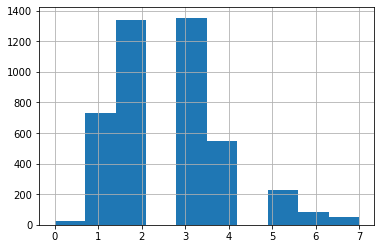

In [184]:
spb['rooms'].hist(range=(0, 7))

(0, 5)

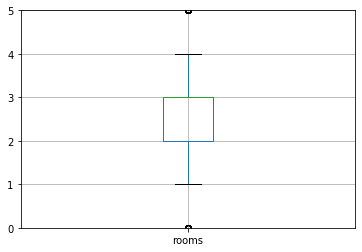

In [185]:
spb.boxplot(column='rooms')
plt.ylim(0, 5)

In [186]:
spb['rooms'].describe()

count    4379.000000
mean        2.720941
std         1.410412
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

Медиана количества комнат 3   
Среднее значение 2.7  
Стандартное отклонение 1.4   
50% квартир это двух- и трех-комнатные квартиры   
Нормальное распределение от 1 до 4 комнат

Изучим высоту потолков у квартир в центре

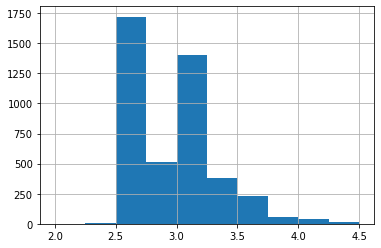

In [187]:
spb['ceiling_height'].hist(range=(2, 4.5))

(2.25, 3.75)

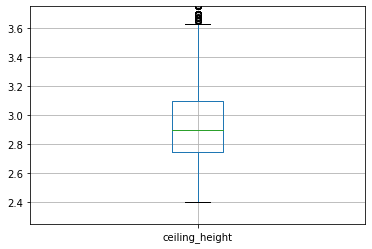

In [188]:
spb.boxplot(column='ceiling_height')
plt.ylim(2.25, 3.75)

In [189]:
spb['ceiling_height'].describe()

count    4379.000000
mean        2.960940
std         0.339506
min         2.400000
25%         2.746363
50%         2.900000
75%         3.100000
max         5.800000
Name: ceiling_height, dtype: float64

Медиана высоты потолка 2.9 м   
Среднее значение 2.96   
Стандартное отклонение 0.34   
50% квартир имеют потолки от 2.75 до 3.1 м   
Нормальное распределение от 2.4 до 3.65 м

Изучим время продажи квартир в центре города

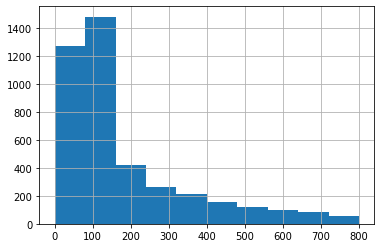

In [190]:
spb['days_exposition'].hist(range=(0, 800))

(-10, 600)

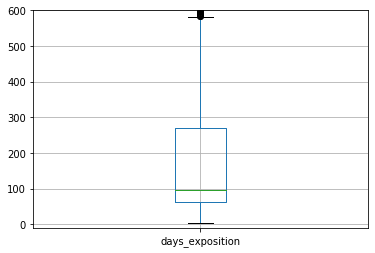

In [191]:
spb.boxplot(column='days_exposition')
plt.ylim(-10, 600)

In [192]:
spb['days_exposition'].describe()

count    4379.000000
mean      214.807034
std       253.026016
min         3.000000
25%        63.000000
50%        95.000000
75%       271.000000
max      1572.000000
Name: days_exposition, dtype: float64

Медиана времени продажи 95 дней.          
Среднее значение 215 дней   
Стандартное отклонение очень велико, 253 дня
50% квартир продаются в период от 63 до 271 дня   
Нормальное распределение от 3 до 590 дней
Соответственно, обычно продажа занимает 95 дней, т.е. 3 месяца   
Можно считать, что продажа прошла очень быстро, если она заняла менее 63 дней (2 месяца)   
И можно сказать, что продажа длилась необычно долго, если она состоялась не ранее, чем через 271 день (9 месяцев) от подачи объявления

Уберем обнаруженные выбросы в проанализированных параметрах квартир в центре города

In [193]:
clear_center_spb = spb.query('12 <= total_area <= 180')
cc = clear_center_spb.query('25000 <= price_per_meter <= 230000')
cc = cc.query('1 <= rooms <= 4')
cc = cc.query('2.4 <= ceiling_height <= 3.65')
cc = cc.query('3 <= days_exposition <= 590')

In [194]:
cc['total_area'].describe()

count    3256.000000
mean       72.420541
std        29.740837
min        12.000000
25%        49.000000
50%        68.000000
75%        89.300000
max       180.000000
Name: total_area, dtype: float64

In [195]:
cc['price_per_meter'].describe()

count      3256.000000
mean     124719.252993
std       33335.444902
min       26250.000000
25%       99757.750167
50%      119583.899941
75%      143633.691705
max      229931.972789
Name: price_per_meter, dtype: float64

In [196]:
cc['rooms'].describe()

count    3256.000000
mean        2.377764
std         0.931997
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: rooms, dtype: float64

In [197]:
cc['ceiling_height'].describe()

count    3256.000000
mean        2.881440
std         0.256639
min         2.400000
25%         2.700000
50%         2.795000
75%         3.053804
max         3.650000
Name: ceiling_height, dtype: float64

In [198]:
cc['days_exposition'].describe()

count    3256.000000
mean      145.668919
std       133.928191
min         3.000000
25%        59.000000
50%        95.000000
75%       196.250000
max       590.000000
Name: days_exposition, dtype: float64

В результате очистки данных числовые показатели параметров квартир пришли в норму:   
У параметра "общая площадь" стандартное отклонение уменьшилось в 2 раза: с 58 до 29 метров.   
У параметра "цена квадратного метра" стандартное отклонение уменьшилось в 2.5 раза: с 85620 до 33330 руб.   
У параметра "количество комнат" стандартное отклонение уменьшилось с 1.4 до 0.9. Медиана изменилась с 3 до 2 комнат.   
У параметра "высота потолка" все числовые показатели незначительно уменьшились.   
У параметра "время продажи" среднее значение уменьшилось с 215 до 145 дней, стандартное отклонение - с 253 до 134 дней.

Восстановим порядок индексации в новой выборке

In [199]:
cc = cc.reset_index(drop = True)
len(cc)

3256

Найдем факторы, которые влияют на стоимость квартир в центре Санкт-Петербурга

Проанализируем влияние числа комнат в квартире на стоимость квадратного метра

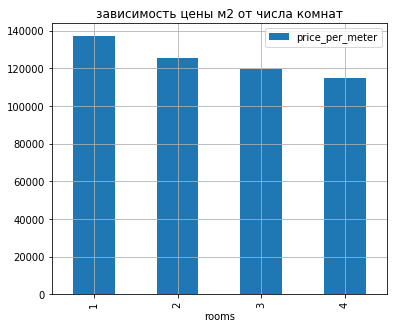

In [200]:
(cc.pivot_table(index='rooms', values='price_per_meter')
 .plot(title='зависимость цены м2 от числа комнат', kind='bar', figsize=(6, 5), grid=True))

Видна обратная зависимость: с ростом числа комнат цена квадратного метра уменьшается

Проанализируем влияние этажа квартиры на стоимость квадратного метра

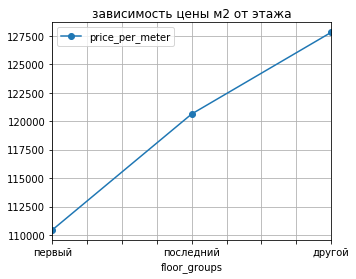

In [201]:
(cc.pivot_table(index='floor_groups', values='price_per_meter').sort_values(by='price_per_meter')
 .plot(title='зависимость цены м2 от этажа',style='o-', figsize=(5, 4), grid=True))

Цена квадратного метра у квартир на первом этаже самая низкая, на последнем этаже - имеет среднее значение. Самая высокая цена у квартир из группы "другой" - это не первый и не последний этаж дома

Проанализируем влияние удаленности от центра на стоимость квадратного метра

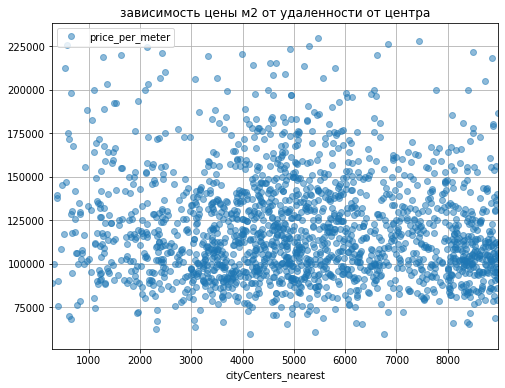

In [202]:
(cc.pivot_table(index='cityCenters_nearest', values='price_per_meter')
 .plot(title='зависимость цены м2 от удаленности от центра', style='o', alpha=0.5, figsize=(8, 6), grid=True))

Стоимость квадратного метра в центре города не зависит от удаленности от центра

Проанализируем зависимость цены квадратного метра в центре от даты размещения объявления: дня недели, месяца и года

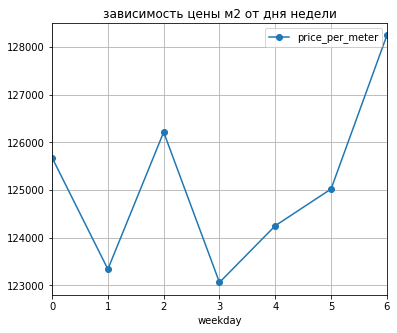

In [203]:
(cc.pivot_table(index='weekday', values='price_per_meter').sort_values(by='weekday')
 .plot(title='зависимость цены м2 от дня недели',style='o-', figsize=(6, 5), grid=True))

Самая высокая цена квадратного метра квартир в воскресных объявлениях. Объявления, поданные во вторник и четверг, содержат квартиры с самой низкой ценой квадратного метра

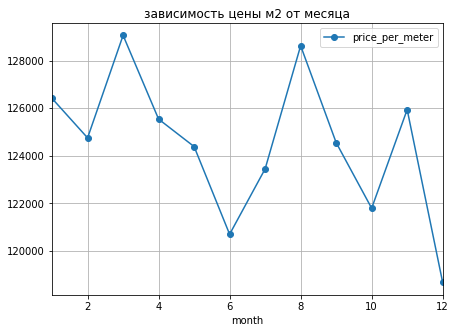

In [204]:
(cc.pivot_table(index='month', values='price_per_meter').sort_values(by='month')
 .plot(title='зависимость цены м2 от месяца', style='o-', figsize=(7, 5), grid=True))

Декабрьские объявления содержат самую низкую цену квадратного метра жилья. В марте и августе - самая высокая цена за метр квадратный

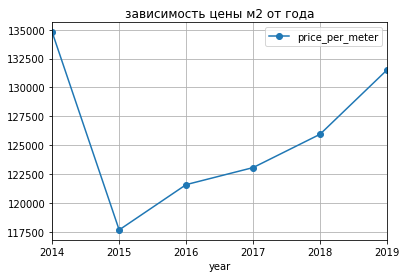

In [205]:
(cc.pivot_table(index='year', values='price_per_meter').sort_values(by='year')
 .plot(title='зависимость цены м2 от года', style='o-', figsize=(6, 4), grid=True))

Самые дешевые квартиры в центре города были в 2015 году, в 2014 и 2019 годах цена квадратного метра была самой высокой

#### Вывод

Проанализировав отдельно квартиры в центре города, мы обнаружили совпадения с выводами по городу в целом и области:
   * стоимость квадратного метра также снижается с увеличением числа комнат   
   * стоимость квадратного метра не зависит от удаленности от центра
   * на стоимость квадратного метра влияет этаж квартиры. Самые дорогие квартиры находятся не на первом и не на последнем этажах   
   * самая высокая стоимость квартир была в 2014 и 2019 годах, а самая низкая - в 2015
   
День и месяц подачи объявления не являются определяющими факторами ценообразования. Влияние дня подачи объявления и месяца подачи объявления на стоимость квартир в центре города отличается от влияния на квартиры по городу в целом и области.

### Шаг 5. Общий вывод

Для проведения анализа нами был изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за период с ноября 2014г. по май 2019г.    

Цель проведенного исследования - установить параметры, влияющие на рыночную стоимость объектов недвижимости.   

Для проведения достоверного анализа была проведена предобработка данных:
   * Для заполнения пропусков нашли парные закономерности между параметрами квартир, применив корреляцию Пирсона
   * В столбце 'first_day_exposition' изменили тип данных столбца на datetime
   * В столбце 'floors_total' избавились от пропусков, привели данные к целочисленному типу
   * В столбце 'ceiling_height' избавились от некорректных данных и пропусков
   * В столбце 'living_area' избавились от пропусков
   * В столбце 'is_apartment' изменили тип данных на bool, избавились от пропусков
   * Столбец 'kitchen_area' очистили от пропусков, проанализировали выдающиеся значения
   * Столбец 'balcony' очистили от пропусков, изменили тип на целочисленный 
   * В столбце 'locality_name' пропуски заменили на значение "неизвестно"
   * В столбцах 'airport_nearest' и 'cityCenters_nearest' избавились от пропусков
   * Столбцы 'parks_around3000' и 'ponds_around3000' очистили от пропусков, изменили тип на целочисленный
   * Столбцы 'parks_nearest' и 'ponds_nearest' очистили от пропусков
   * Столбец 'days_exposition' очистили от пропусков, изменили тип данных
   * Проверили данные на наличие дубликатов   

Данные в таблице сгруппировали по величине общей площади квартиры и по ее этажу в доме (первый, последний, другой).   
Для каждого объявления отобразили день недели, месяц и год его публикации.    
Добавили дополнительные параметры квартир:
   * цена квадратного метра
   * отношение жилой площади к общей
   * отношение площади кухни к общей площади      
   
Изучили основные параметры продаваемых квартир и очистили их от редких и выбивающихся значений:
   * общая площадь
   * стоимость квартиры
   * цена квадратного метра
   * количество комнат
   * высота потолков
   * длительность времени продажи   
   
Выяснили, что обычно время продажи квартиры в Санкт-Петербурге и Ленинградской области занимает 95 дней. Можно считать, что квартира продалась очень быстро, если продажа заняла менее 45 дней. И можно считать, что квартира продавалась очень медленно, если продажа заняла 200 и более дней.   

#### В результате анализа выяснили, какие факторы более всего влияют на стоимость квартир в Санкт-Петербурге и области:   
1. Этаж квартиры. Самая высокая цена квадратного метра у квартир не на первом и не на последнем этажах
2. С увеличением числа комнат в квартире стоимость квадратного метра снижается
3. Год подачи объявления. Самая высокая стоимость в 2014 году, самая низкая - в 2015 г.
4. Месяц подачи объявления. Самая низкая цена у июньских квартир
5. День подачи объявления. Самая низкая цена у квартир, объявление о которых было подано в субботу   

Линейная зависимость стоимости квартиры от удаленности от центра города отсутствует. Однако можно сделать вывод, что по мере удаленности от центра снижается цена квартиры и количество предложений.

Изучили стоимость квартир в 10 населенных пунктов с наибольшим числом объявлений.   
В Санкт-Петербурге самая высокая стоимость квадратного метра жилья, 105528 руб.   
В Выборге самая низкая стоимость квадратного метра жилья, 57737 руб.   

#### В результате анализа зависимости стоимости жилья от удаленности от центра города образовалось три основные ценовые группы в зависимости от расстояния до центра города:

   - центральная - это центр города, самый дорогой сегмент, от 0 до 9 км
   - средняя - самая массовая группа, от 9 до 20 км
   - окраина города - самая малочисленная, дешевая и удаленная от центра, от 20 до 30 км.   
   
#### Так же был проведен анализ влияния факторов на стоимость квартир в центральной части Санкт-Петербурга.    
Обнаружены совпадения с выводами по городу в целом и области:

1. Стоимость квадратного метра также снижается с увеличением числа комнат
2. На стоимость квадратного метра влияет этаж квартиры. Самые дорогие квартиры находятся не на первом и не на последнем этажах
3. Самая высокая стоимость квартир была в 2014 и 2019 годах, а самая низкая - в 2015

В центре Санкт-Петербурга стоимость квадратного метра не зависит от удаленности от центра. На расстоянии от 0 до 9 километров от центра представлены квартиры во всех ценовых категориях.   

Сравнивая центр города и весь регион в целом можно сделать вывод, что день и месяц подачи объявления не являются определяющими факторами ценообразования. Влияние дня подачи объявления и месяца подачи объявления на стоимость квартир в центре города отличается от влияния на квартиры по городу в целом и области.


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод